In [1]:
import sys, cv2, os, re, random
sys.path.append('../')

from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from fddb_reader import *
from equi_augmentation import *
from utils import *
figsize(12, 5)

np.random.seed(42)

In [2]:
backs = [cv2.imread(url) for url in get_files_folder('../data/equi_backs', is_image)] ## background

In [3]:
images = read_fold("../data/FDDB-folds/FDDB-fold-10-ellipseList.txt")

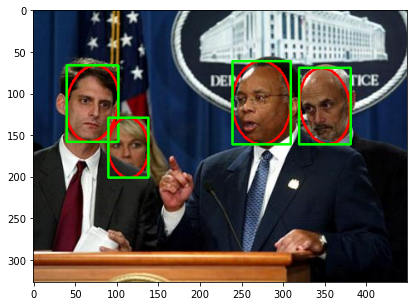

In [5]:
image = draw_image(images[218], draw_faces = True)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
def project_fddb_to_equi(image_data, back, phi, theta, r_h = 1, draw_faces = False):
    
    image = draw_image(image_data, draw_faces = False)
    
    #print(image_data)
    
    projected, _, projector = image_projection_to_equi(back, image, phi, theta, r_h = r_h)
    proj_path = image_data['path'].replace('/', '_')+'.jpg'
    
    projected_faces = projected.copy()
    
    faces_points = []
    for face in image_data['faces']:
        
        projected_pointsy_x = projector(get8boundingpointsy_x(face['bounding_box']))
        projected_points = [(p[1],p[0]) for p in projected_pointsy_x]
        faces_points.append(projected_points)
        
        t_left, t_center, t_right, c_left, c_right, b_left, b_center, b_right = projected_points
        
        projected_faces = draw_points(projected_faces, projected_points, color = (255,0,0))
   
    if draw_faces:
        plt.imshow(cv2.cvtColor(projected_faces, cv2.COLOR_BGR2RGB))
        plt.show()
        
    return projected, faces_points

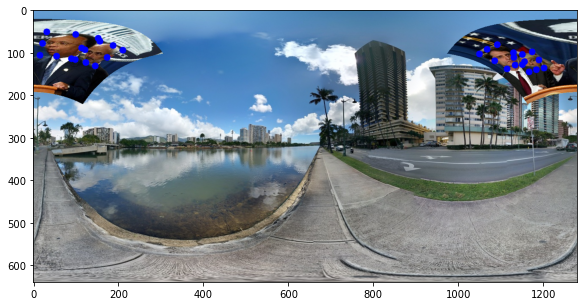

In [7]:
back = backs[np.random.randint(len(backs))]

proj, faces_points = project_fddb_to_equi(images[218], back.copy(), np.radians(-60), np.radians(180),r_h=0.9, draw_faces = True)